# Task 4.10 Part 1

### Step 1

Import the data set you exported in Exercise 4.9 into a new Jupyter notebook. This should be the merged version of your data that contains the new customers column.

In [2]:
# Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

# Suppress the warning
pd.options.mode.chained_assignment = None

In [3]:
# Turn your project folder path into a string
path = r'/Users/dianafayarbas/Desktop/10.24.2023 Instacart Basket Analysis'

In [4]:
path

'/Users/dianafayarbas/Desktop/10.24.2023 Instacart Basket Analysis'

In [5]:
ords_prods_custs = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'ords_prods_custs4.9.pkl'))

### Step 2

Consider any security implications that might exist for this new data. You’ll need to address any PII data in the data before continuing your analysis.

**To address PII data, I am dropping the columns first_name and last_name.**

In [6]:
ords_prods_custs = ords_prods_custs.drop(['first_name', 'last_name'], axis=1)

### Step 3

The Instacart officers are interested in comparing customer behavior in different geographic areas. Create a regional segmentation of the data. You’ll need to create a “Region” column based on the “State” column from your customers data set.

Use the region information in this Wikipedia article to create your column (you only need to create regions, not divisions).

Determine whether there’s a difference in spending habits between the different U.S. regions. (Hint: You can do this by crossing the variable you just created with the spending flag.)

In [7]:
# Create a new list that classifies states into regions
region = []

for value in ords_prods_custs["state"]:
  if value == 'Maine' or value == 'New Hampshire' or value == 'Vermont' or value == 'Massachusetts' or value == 'Rhode Island' or value == 'Connecticut' or value == 'New York' or value == 'Pennsylvania' or value == 'New Jersey':
    region.append("Northeast")
  elif value == 'Wisconsin' or value == 'Michigan' or value == 'Illinois' or value == 'Indiana' or value == 'Ohio' or value == 'North Dakota' or value == 'South Dakota' or value == 'Nebraska' or value == 'Kansas' or value == 'Minnesota' or value == 'Iowa' or value == 'Missouri':
    region.append("Midwest")
  elif value == 'Delaware' or value == 'Maryland' or value == 'District of Columbia' or value == 'Virginia' or value == 'West Virginia' or value == 'North Carolina' or value == 'South Carolina' or value == 'Georgia' or value == 'Florida' or value == 'Kentucky' or value == 'Tennessee' or value == 'Mississippi' or value == 'Alabama' or value == 'Oklahoma' or value == 'Texas' or value == 'Arkansas' or value == 'Lousiana':
    region.append("South")
  else:
    region.append("West")

In [8]:
# Add a new column named 'region' to ords_prods_custs and populate it with region
ords_prods_custs['region'] = region

In [9]:
# Count the frequency of unique values in 'region'
ords_prods_custs['region'].value_counts(dropna=False)

South        10154403
West          8930395
Midwest       7597325
Northeast     5722736
Name: region, dtype: int64

In [10]:
# Count the frequency of unique values in 'spending_flag'
ords_prods_custs['spending_flag'].value_counts(dropna=False)

High spender    20332281
Low spender     12072578
Name: spending_flag, dtype: int64

In [11]:
# Create a crosstab between “region” and “spending_flag”
region_spending = pd.crosstab(ords_prods_custs['region'], ords_prods_custs['spending_flag'], dropna = False)
region_spending

spending_flag,High spender,Low spender
region,,
Midwest,4731873,2865452
Northeast,3609752,2112984
South,6373710,3780693
West,5616946,3313449


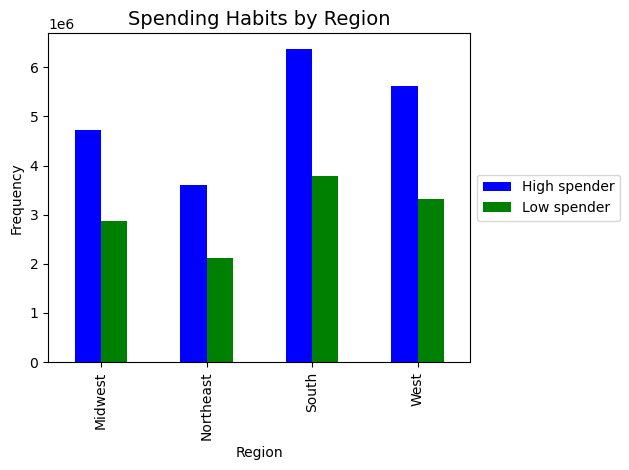

In [12]:
# Create a bar plot that displays spending habits by region
bar_region_spending=region_spending.plot.bar(color=['blue','green'])
plt.xlabel("Region")
plt.ylabel("Frequency")
plt.title("Spending Habits by Region", fontsize=14)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.tight_layout()

In [13]:
# Save bar plot as an image file
bar_region_spending.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_region_spending.png'))

**The project brief has the question: Are there differences in ordering habits based on a customer's region? To answer this, let's summarize the relationship between region and loyalty_flag.**

In [62]:
# Create a crosstab between “region” and “loyalty_flag”
region_loyalty = pd.crosstab(ords_prods_custs['region'], ords_prods_custs['loyalty_flag'], dropna = False)
region_loyalty

loyalty_flag,Loyal customer,New customer,Regular customer
region,,,
Midwest,2373774,1472573,3750978
Northeast,1841785,1100207,2780744
South,3209720,1955721,4988962
West,2858814,1715489,4356092


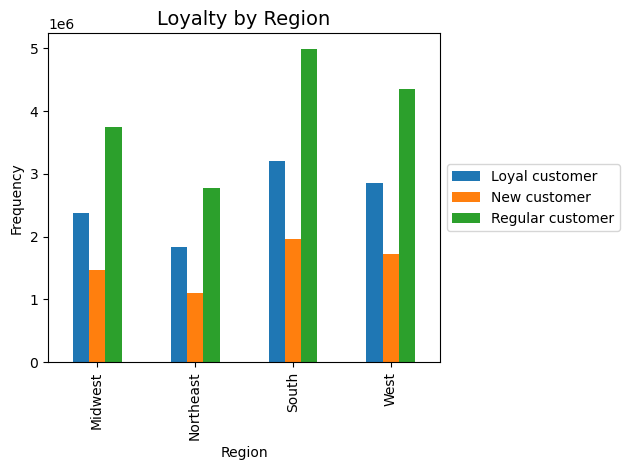

In [65]:
# Create a bar plot that displays loyalty by region
bar_region_loyalty=region_loyalty.plot.bar()
plt.xlabel("Region")
plt.ylabel("Frequency")
plt.title("Loyalty by Region", fontsize=14)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.tight_layout()

# Save bar plot as an image file
bar_region_loyalty.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_region_loyalty.png'))

### Step 4

The Instacart CFO isn’t interested in customers who don’t generate much revenue for the app. Create an exclusion flag for low-activity customers (customers with less than 5 orders) and exclude them from the data. Make sure you export this sample.

In [14]:
# Create an exclusion flag based on 'max_order'
ords_prods_custs.loc[ords_prods_custs['max_order']>= 5, 'exclusion_flag'] = 'High-activity customer'
ords_prods_custs.loc[ords_prods_custs['max_order']< 5, 'exclusion_flag'] = 'Low-activity customer'

In [15]:
# Count the frequency of unique values in 'exclusion_flag'
ords_prods_custs['exclusion_flag'].value_counts (dropna = False)

High-activity customer    30964564
Low-activity customer      1440295
Name: exclusion_flag, dtype: int64

In [16]:
# Exclude low-activity customers from data
# Create a new df of only high-activity customers
high_activity_cust = ords_prods_custs[ords_prods_custs['exclusion_flag'] == 'High-activity customer']

In [17]:
high_activity_cust.shape

(30964564, 32)

In [18]:
# Export sample of high-activity customers
high_activity_cust.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'high_activity_customers.pkl'))

**Moving forward, I will use high_activity_cust because the Instacart CFO wants to focus on customers who generate more revenue.**

### Step 5

The marketing and business strategy units at Instacart want to create more-relevant marketing strategies for different products and are, thus, curious about customer profiling in their database. Create a profiling variable based on age, income, certain goods in the “department_id” column, and number of dependents. You might also use the “orders_day_of_the_week” and “order_hour_of_day” columns if you can think of a way they would impact customer profiles. (Hint: As an example, try thinking of what characteristics would lead you to the profile “Single adult” or “Young parent.”)

**I will create a profiling variable that categorizes customers as single adults, young parents, or senior shoppers based on age, income, department, number of dependents.**

### Age groups

In [19]:
# Summary statistics for age
high_activity_cust['age'].describe()

count    3.096456e+07
mean     4.946803e+01
std      1.848528e+01
min      1.800000e+01
25%      3.300000e+01
50%      4.900000e+01
75%      6.500000e+01
max      8.100000e+01
Name: age, dtype: float64

**The minimum age is 18, the maximum age is 81, and the mean age is 49.**

In [20]:
# Create age_group column with the following categories:
# 18-35 Young Adult, 36-64 Adult, and 65-81 Senior

high_activity_cust.loc[(high_activity_cust['age'] >= 18) & (high_activity_cust['age'] < 36), 'age_group'] = 'Young Adult'

In [21]:
high_activity_cust.loc[(high_activity_cust['age'] >= 36) & (high_activity_cust['age'] < 65), 'age_group'] = 'Adult'

In [22]:
high_activity_cust.loc[(high_activity_cust['age'] >= 65) & (high_activity_cust['age'] < 82), 'age_group'] = 'Senior'

In [23]:
# Print the frequency of age_group
high_activity_cust['age_group'].value_counts(dropna = False)

Adult          14030215
Young Adult     8738805
Senior          8195544
Name: age_group, dtype: int64

Text(0, 0.5, 'Count')

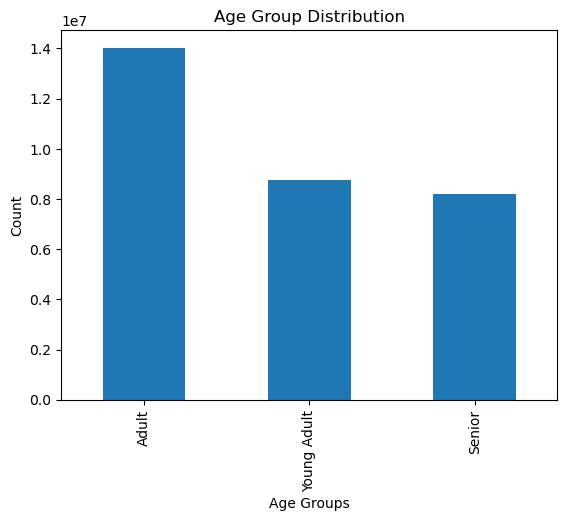

In [24]:
# Create a bar plot that visually displays the distribution of the 'age_group' values
age_bar = high_activity_cust['age_group'].value_counts().plot.bar()

# Add a chart title
plt.title('Age Group Distribution')

# Add an x-axis label
plt.xlabel('Age Groups')

# Add a y-axis label
plt.ylabel('Count')

In [25]:
# Save bar plot as an image file
age_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'age_bar.png'))

### Income groups

In [26]:
# Summary statistics for income
high_activity_cust['income'].describe()

count    3.096456e+07
mean     9.967587e+04
std      4.314187e+04
min      2.590300e+04
25%      6.729200e+04
50%      9.676500e+04
75%      1.281020e+05
max      5.939010e+05
Name: income, dtype: float64

**The minimum income is 25,903. The maximum income is 593,901. The mean income is 99,437.73.**

In [27]:
# Create income_group column with the following categories:
# Low-income < $50K, middle-income $50K-$150K, and high-income $150K+

high_activity_cust.loc[high_activity_cust['income'] < 50000, 'income_group'] = 'Low-income'

In [28]:
high_activity_cust.loc[(high_activity_cust['income'] >= 50000) & (high_activity_cust['income'] < 150000), 'income_group'] = 'Middle-income'

In [29]:
high_activity_cust.loc[high_activity_cust['income'] >= 150000, 'income_group'] = 'High-income'

In [30]:
# Count frequency of unique values in 'income_group'
high_activity_cust['income_group'].value_counts(dropna=False)

Middle-income    23706735
High-income       3895275
Low-income        3362554
Name: income_group, dtype: int64

Text(0, 0.5, 'Count')

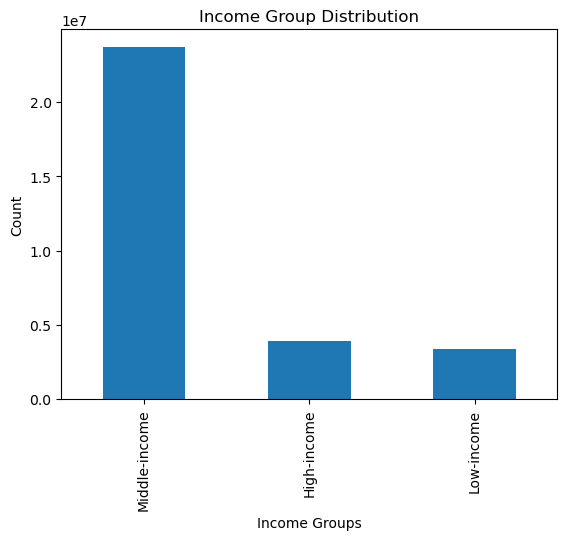

In [31]:
# Create a bar plot that visually displays the distribution of 'income_group'
income_bar = high_activity_cust['income_group'].value_counts().plot.bar()

# Add a chart title
plt.title('Income Group Distribution')

# Add an x-axis label
plt.xlabel('Income Groups')

# Add a y-axis label
plt.ylabel('Count')

In [32]:
# Save bar plot as an image file
income_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'income_bar.png'))

### Departments

In [33]:
# Import departments
departments = pd.read_csv(os.path.join(path,'02 Data', 'Prepared Data', 'departments_wrangled.csv'))

In [34]:
# Renaming first column to 'department_id'
departments.rename(columns = {'Unnamed: 0' : 'department_id'}, inplace = True)

In [35]:
# Merge departments with latest dataset on department_id
df = high_activity_cust.merge(departments, on = 'department_id')

**Moving forward, I will be using df, which is the most updated dataframe merged with departments.**

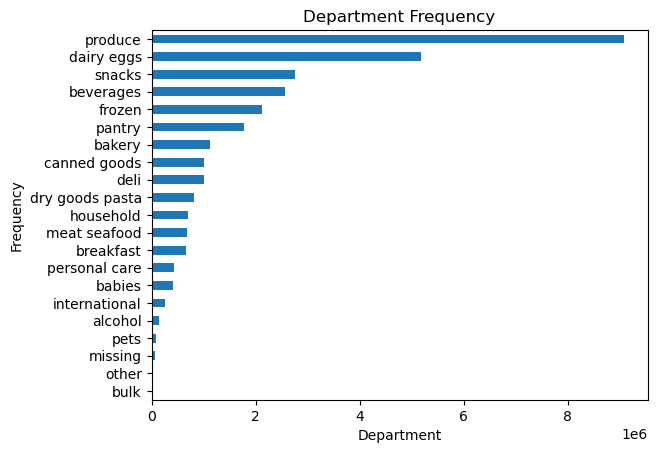

In [36]:
# Count the frequency of unique values in 'department'
department_counts = df['department'].value_counts(ascending=True)

# Create a bar chart
dept_bar = department_counts.plot(kind='barh')

# Add chart title
plt.title('Department Frequency')

# Add x-axis label
plt.xlabel('Department')

# Add y-axis label
plt.ylabel('Frequency')

# Show the plot
plt.show()

**To answer a key question from the project brief, the most popular product is produce.**

In [37]:
# Save horizontal bar plot as an image file
dept_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'dept_bar.png'))

### Dependents

In [38]:
# Create dependents_group column for has dependents and no dependents
df.loc[df['num_dependents'] == 0, 'dependents_group'] = 'No dependents'

In [39]:
df.loc[df['num_dependents'] > 0, 'dependents_group'] = 'Has dependents'

In [40]:
# Count frequency of unique values in 'dependents_group'
df['dependents_group'].value_counts(dropna=False)

Has dependents    23224883
No dependents      7739681
Name: dependents_group, dtype: int64

Text(0, 0.5, 'Count')

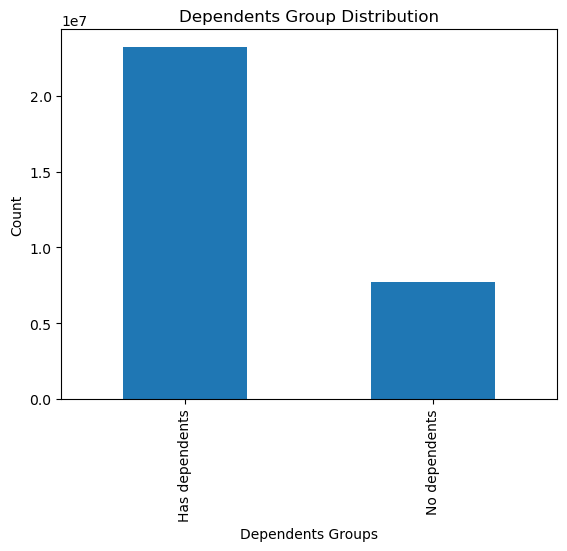

In [41]:
# Create a bar plot that visually displays the distribution of 'dependents_group'
deps_bar = df['dependents_group'].value_counts().plot.bar()

# Add a chart title
plt.title('Dependents Group Distribution')

# Add an x-axis label
plt.xlabel('Dependents Groups')

# Add a y-axis label
plt.ylabel('Count')

In [42]:
# Save bar plot as an image file
deps_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'deps_bar.png'))

### Profiling variable

In [43]:
# Create profiling column for single adult, young parent, and senior shopper
df.loc[df['marital_status'] == 'single', 'profiling'] = 'Single adult'
df.loc[(df['department'] == 'babies') & ((df['age_group'] == 'Adult') | (df['age_group'] == 'Young Adult')), 'profiling'] = 'Young parent'
df.loc[df['age_group'] == 'Senior', 'profiling'] = 'Senior shopper'

In [44]:
# Count frequency of unique values in 'profiling'
df['profiling'].value_counts(dropna=False)

NaN               17439399
Senior shopper     8195544
Single adult       5025433
Young parent        304188
Name: profiling, dtype: int64

### Step 6

Create an appropriate visualization to show the distribution of profiles.

Text(0, 0.5, 'Number of Orders')

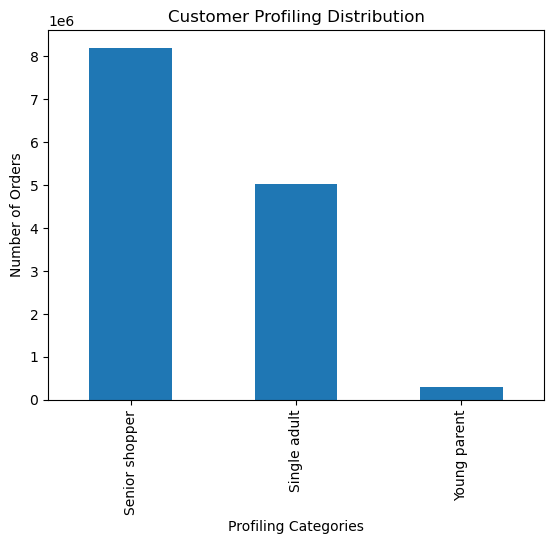

In [66]:
# Create a bar plot that visually displays the distribution of the 'profiling' values
profiling_bar = df['profiling'].value_counts().plot.bar()

# Add a chart title
plt.title('Customer Profiling Distribution')

# Add an x-axis label
plt.xlabel('Profiling Categories')

# Add a y-axis label
plt.ylabel('Number of Orders')

In [67]:
# Save bar plot as an image file
profiling_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'profiling_bar.png'))

### Step 7

Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure.

In [47]:
# Aggregating max, mean, and min variables on a customer-profile level (profiling) expenditure
profiling_agg = df.groupby('profiling').agg({'order_id': 'count','prices': ['min', 'mean', 'max']})
profiling_agg

order_id prices                    
                  count    min       mean      max
profiling                                         
Senior shopper  8195544    1.0  11.757768  99999.0
Single adult    5025433    1.0  12.464801  99999.0
Young parent     304188    1.0   7.628701     15.0

In [48]:
# Aggregating max, mean, and min variables on a customer-profile level (profiling) for usage frequency
profiling_agg2 = df.groupby('profiling').agg({'order_id': 'count','days_since_prior_order': ['min', 'mean', 'max']})
profiling_agg2

order_id days_since_prior_order                 
                  count                    min       mean   max
profiling                                                      
Senior shopper  8195544                    0.0  10.791788  30.0
Single adult    5025433                    0.0  10.826465  30.0
Young parent     304188                    0.0   9.746415  30.0

### Step 8

Compare your customer profiles with regions and departments. Can you identify a link between them? Customers may demonstrate different behaviors across regions, which could make this information important.

#### Customer profiles in different regions

In [49]:
# Summarize relationship between 'profiling' and 'region'
region_profiling = pd.crosstab(df['profiling'],df['region'], dropna = False)
region_profiling

region,Midwest,Northeast,South,West
profiling,,,,
Senior shopper,1904046,1484807,2547754,2258937
Single adult,1189192,863675,1584182,1388384
Young parent,72115,53590,96553,81930


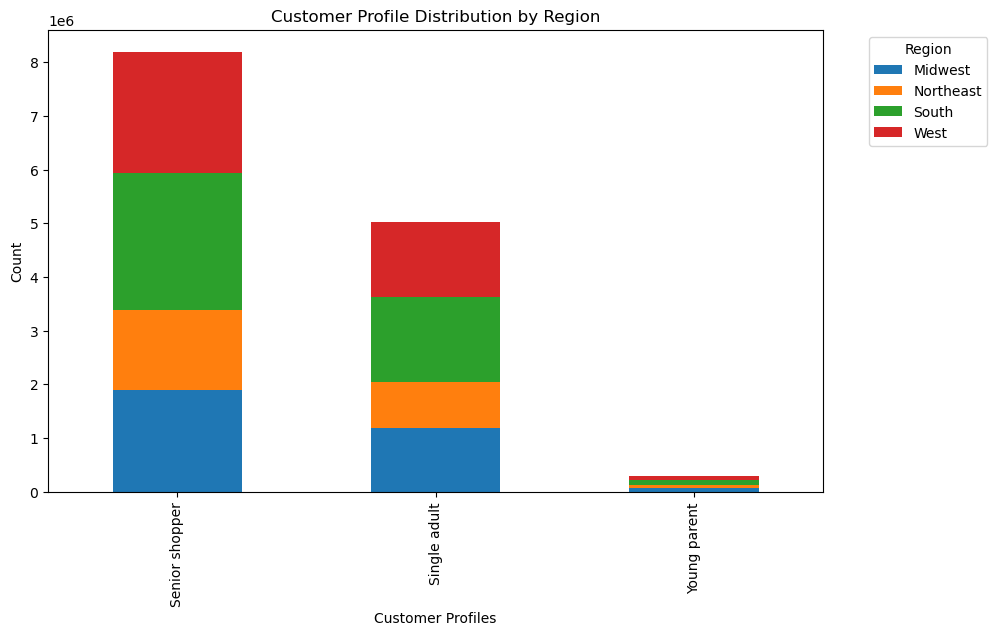

In [50]:
# Create a stacked bar plot
region_profiling_bar_stacked = region_profiling.plot.bar(stacked=True, figsize=(10, 6))

plt.title('Customer Profile Distribution by Region')
plt.xlabel('Customer Profiles')
plt.ylabel('Count')
plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')

In [51]:
# Save bar plot as an image file
region_profiling_bar_stacked.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'region_profiling_bar_stacked.png'))

#### Customer profiles across departments

In [52]:
# Summarize relationship between 'profiling' and 'department'
dept_profiling = pd.crosstab(df['department'],df['profiling'], dropna = False)
dept_profiling

profiling,Senior shopper,Single adult,Young parent
department,,,
alcohol,36693,24968,0
babies,106204,0,304188
bakery,295997,185660,0
beverages,684020,424462,0
breakfast,175296,109842,0
bulk,8945,5324,0
canned goods,267509,166752,0
dairy eggs,1368072,851774,0
deli,265199,166633,0


### Step 9

Produce suitable charts to illustrate your results and export them in your project folder.

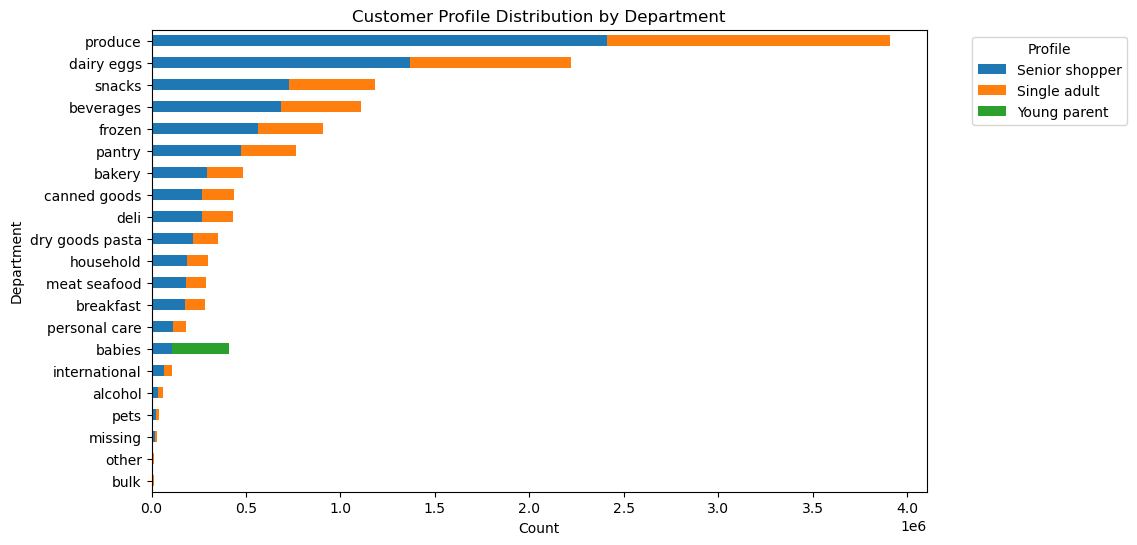

In [60]:
# Sort dept_profiling by 'Senior shopper' in descending order
dept_profiling_sorted = dept_profiling.sort_values(by='Senior shopper', ascending=True)

# Create a horizontal stacked bar plot
dept_profiling_bar = dept_profiling_sorted.plot.barh(stacked=True, figsize=(10, 6))

plt.title('Customer Profile Distribution by Department')
plt.xlabel('Count')
plt.ylabel('Department')
plt.legend(title='Profile', bbox_to_anchor=(1.05, 1), loc='upper left')

In [54]:
# Save bar plot as an image file
dept_profiling_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'dept_profiling_bar.png'))

**A key question from the project brief is: Are there differences in ordering habits based on a customer's loyalty status?**

In [55]:
# Summarize relationship between 'loyalty_flag' and 'department'
dept_loyalty = pd.crosstab(df['department'],df['loyalty_flag'], dropna = False)
dept_loyalty

loyalty_flag,Loyal customer,New customer,Regular customer
department,,,
alcohol,38723,28629,77275
babies,167108,46708,196576
bakery,379873,172104,568851
beverages,855017,396649,1320235
breakfast,221577,106179,343094
bulk,13834,4149,15468
canned goods,294594,180196,537284
dairy eggs,1830707,750056,2596419
deli,324046,158335,521453


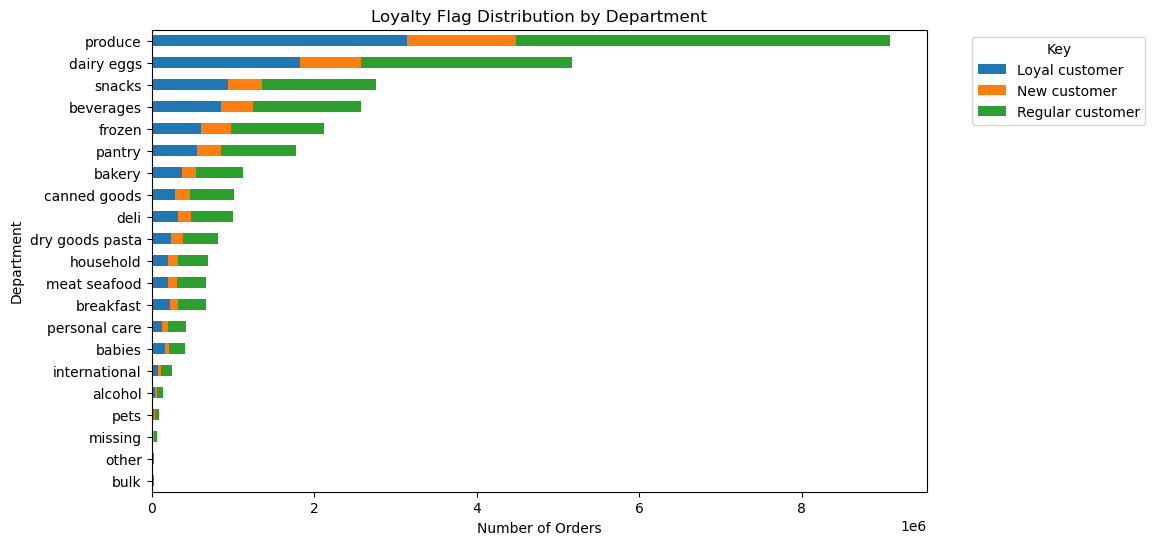

In [59]:
# Sort dept_loyalty by 'Regular customer' in descending order
dept_loyalty_sorted = dept_loyalty.sort_values(by='Regular customer', ascending=True)

# Create a horizontal stacked bar plot
dept_loyalty_bar = dept_loyalty_sorted.plot.barh(stacked=True, figsize=(10, 6))

plt.title('Loyalty Flag Distribution by Department')
plt.xlabel('Number of Orders')
plt.ylabel('Department')
plt.legend(title='Key', bbox_to_anchor=(1.05, 1), loc='upper left')

In [58]:
# Save bar plot as an image file
dept_loyalty_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'dept_loyalty_bar.png'))

### Step 10

Tidy up your script, export your final data set, and save your notebook.

In [54]:
# Export final dataset
df.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'final_df.pkl'))